# Text Classification - OneClass Classificaiton

The one-class algorithms are based on recognition since their aim is to recognize data from a particular class, and reject data from all other classes. This is accomplished by creating a boundary that encompasses all the data belonging to the target class within itself, so when a new sample arrives the algorithm only has to check whether it lies within the boundary or outside and accordingly classify the sample as belonging to the target class or the outlier.

Things we are going to discuss:

1. Data Preparation 
2. Cleaning and Tokenization
3. Feature Extraction
4. Train One-class classificaiton model
5. Predict one-class on test data

In [45]:
# Load packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.svm import OneClassSVM
from sklearn.utils import shuffle
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem.porter import PorterStemmer
import string
import spacy
import nltk
from spacy.lang.en import English
#nltk_tokens = nltk.sent_tokenize(sentence_data)
#spacy.load('en')
#parser = English()

In [46]:
# load dataset
bbc_df = pd.read_csv(r'C:\Users\ranjith_n\Downloads\prod_tasklist.csv',encoding='latin1')

In [47]:
bbc_df.head(10)

,PROJ_NAME,TRACK GROUP,TRACK,DOMAIN,TASK,category,Unnamed: 6,Unnamed: 7
0,Alkermes,WINTEL DOMAIN,Vmware,Powershell,VM tools updates by ESX update,automatable,NaN,NaN
1,Alkermes,WINTEL DOMAIN,Vmware,Powershell,Patch Management,automatable,NaN,NaN
2,Alkermes,WINTEL DOMAIN,Vmware,Powershell,VM Deployment with command,automatable,NaN,NaN
3,Alkermes,WINTEL DOMAIN,Vmware,"Tools, Optibot, Python & Misc",Performance report,automatable,NaN,NaN
4,Alkermes,WINTEL DOMAIN,Vmware,Powershell,"Report for snapshot, CDP and etc",automatable,NaN,NaN
5,Alkermes,WINTEL DOMAIN,Vmware,Powershell,VM Hardware installation with commands,automatable,NaN,NaN
6,Alkermes,WINTEL DOMAIN,Vmware,Powershell,VM Startup and Shutdown with commands,automatable,NaN,NaN
7,Alkermes,NETWORKS DOMAIN,Network,Powershell,Device Up/Down,automatable,NaN,NaN
8,Alkermes,NETWORKS DOMAIN,Network,Powershell,Link/Interface Up Down,automatable,NaN,NaN
9,Alkermes,NETWORKS DOMAIN,Network,Powershell,CPU Utilization,automatable,NaN,NaN


In [48]:
bbc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16971 entries, 0 to 16970
Data columns (total 8 columns):
PROJ_NAME      14416 non-null object
TRACK GROUP    14416 non-null object
TRACK          14416 non-null object
DOMAIN         14416 non-null object
TASK           16971 non-null object
category       16971 non-null object
Unnamed: 6     3 non-null object
Unnamed: 7     1 non-null object
dtypes: object(8)
memory usage: 1.0+ MB


In [49]:
#bbc_df['category'] = 1
bbc_df['category'].unique()

array(['automatable', 'non-automatable'], dtype=object)

In [50]:
bbc_df['category'].value_counts()

automatable        14416
non-automatable     2555
Name: category, dtype: int64

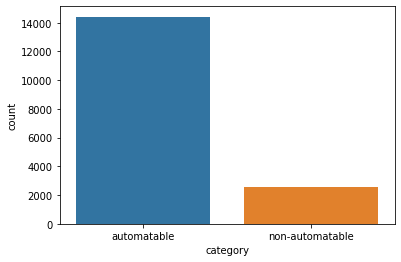

In [51]:
sns.countplot(bbc_df['category'])

# wordcloud for ALL inputs

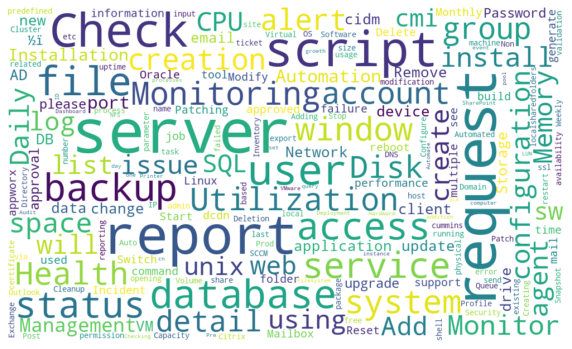

In [52]:
%matplotlib inline

from wordcloud import WordCloud

all_words = ' '.join([text for text in bbc_df.TASK])

wordcloud = WordCloud(width= 1000, height= 600,
                          max_font_size = 110,
                          collocations = False,background_color='white').generate(all_words)

import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Word cloud for automatable tasks

In [53]:
autoip = bbc_df[bbc_df['category'] == 1]['TASK']
noautoip = bbc_df[bbc_df['category'] == -1]['TASK']
print(len(autoip))
print(len(noautoip))

0
0


In [54]:
%matplotlib inline

from wordcloud import WordCloud

all_words = ' '.join([text for text in autoip])

realwordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False,background_color='white').generate(all_words)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.imshow(realwordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.

# word cloud for non-automatable inputs

In [ ]:
%matplotlib inline

from wordcloud import WordCloud

all_words = ' '.join([text for text in noautoip])

fakewordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False,background_color='white').generate(all_words)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
plt.imshow(fakewordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#as we can see man,new,report,woman,american,trump are the most used words

In [ ]:
import collections
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) 

autofreqwords=[x.lower() for y in bbc_df[bbc_df['category']==1]['TASK'] for x in y.split() if x not in stop_words and len(x) > 3]
nonautofreqwords=[x.lower() for y in bbc_df[bbc_df['category']==-1]['TASK'] for x in y.split() if x not in stop_words and len(x) > 3]
automatablecounts = collections.Counter(autofreqwords)
autodict = dict(sorted(automatablecounts.items(),
                           key=lambda item: item[1],
                           reverse=True))
nonautodict = dict(sorted(collections.Counter(nonautofreqwords).items(),
                           key=lambda item: item[1],
                           reverse=True))

# plotting the top 20 frequent words in the automatable inputs
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

data = list(autodict.values())[0:20]
plt.figure(figsize=(30,10))
plt.bar(list(autodict.keys())[0:20], data)
plt.show()

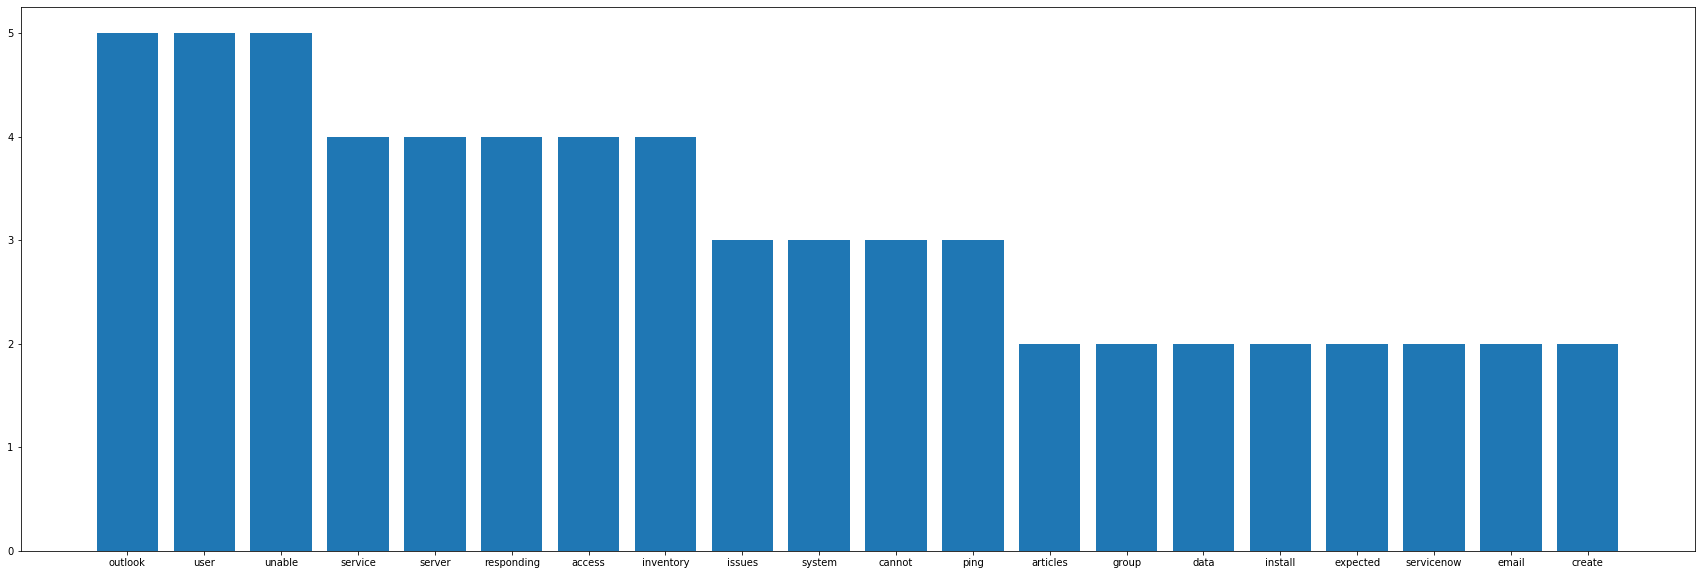

In [55]:
data = list(nonautodict.values())[0:20]
plt.figure(figsize=(30,10))
plt.bar(list(nonautodict.keys())[0:20], data)
plt.show()

## Data preparation

Let's take "sport" category as our traning class for one-class classification

so let's replace the category labels

Since "sport" is our traning class let's replace "sport" with "1" and replace "business, politics, tech and entertainment" with "-1"

becuase one-class classification model prediction will be 1 or -1

here "1" is target class and "-1" is the outlier

In [56]:
# change category labels
bbc_df['category'] = bbc_df['category'].map({'automatable':1,'non-automatable':-1})

In [57]:
# create a new dataset with only sport category data
sports_df = bbc_df[bbc_df['category'] == 1]

In [58]:
sports_df.shape

(14416, 8)

In [59]:
# create train and test data
train_text = sports_df['TASK'].tolist()
train_labels = sports_df['category'].tolist()

test_text = bbc_df['TASK'].tolist()
test_labels = bbc_df['category'].tolist()

## Data Cleaning and Tokenization

In [60]:
import re
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer() 
# stop words list
STOPLIST = set(stopwords.words('english') + list(ENGLISH_STOP_WORDS)) 
# special characters
SYMBOLS = " ".join(string.punctuation).split(" ") + ["-", "...", "”", "”","''"]

In [61]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 
# class for cleaning the text
class CleanTextTransformer(TransformerMixin):
    def transform(self, X, **transform_params):
        return [cleanText(text) for text in X]
    def fit(self, X, y=None, **fit_params):
        return self
    def get_params(self, deep=True):
            return {}

def cleanText(text):
    text = text.strip().replace("\n", " ").replace("\r", " ")
    text = text.lower()
    return text

In [62]:
def tokenizeText(sample):
    
    tokens = sample.split()
    
    # lemmatization
    lemmas = []
    for tok in tokens:
        lemmas.append(lemmatizer.lemmatize(tok).strip())
    tokens = lemmas
    
    # remove stop words and special characters
    tokens = [tok for tok in tokens if tok.lower() not in STOPLIST]
    tokens = [tok for tok in tokens if tok not in SYMBOLS]
    
    # only take words with length greater than or equal to 3
    tokens = [tok for tok in tokens if len(tok) >= 3]
    
    # remove remaining tokens that are not alphabetic
    tokens = [tok for tok in tokens if tok.isalpha()]
    
    # stemming of words
    porter = PorterStemmer()
    tokens = [porter.stem(word) for word in tokens]
    
    return list(set(tokens))

In [63]:
# lets see tokenized random text
tokenizeText(train_text[9])

['util', 'cpu']

## Feature Extraction

In [64]:
# getting features

vectorizer = HashingVectorizer(n_features=20,tokenizer=tokenizeText)

features = vectorizer.fit_transform(train_text).toarray()
features.shape

(14416, 20)

## One-class SVM

One-class SVM is an unsupervised algorithm that learns a decision function for novelty detection: classifying new data as similar or different to the training set.

In [280]:
from sklearn.calibration import CalibratedClassifierCV
# OneClassSVM algorithm
clf = OneClassSVM(nu=0.1, kernel="linear", gamma=0.01)
#kernel='rbf', nu=outlier_prop, gamma=0.000001
#scv_calibrated = CalibratedClassifierCV(clf)
pipe_clf = Pipeline([('cleanText', CleanTextTransformer()), ('vectorizer', vectorizer), ('clf', clf)])


In [281]:
# fit OneClassSVM model 
pipe_clf.fit(train_text, train_labels)


Pipeline(memory=None,
         steps=[('cleanText',
                 <__main__.CleanTextTransformer object at 0x00000295104EFF60>),
                ('vectorizer',
                 HashingVectorizer(alternate_sign=True, analyzer='word',
                                   binary=False, decode_error='strict',
                                   dtype=<class 'numpy.float64'>,
                                   encoding='utf-8', input='content',
                                   lowercase=True, n_features=20,
                                   ngram_range=(1, 1), norm='l2',
                                   preprocessor=None, stop_words=None,
                                   strip_accents=None,
                                   token_pattern='(?u)\\b\\w\\w+\\b',
                                   tokenizer=<function tokenizeText at 0x000002950FA792F0>)),
                ('clf',
                 OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.01,
                             ker

In [282]:
# calculate score
# validate OneClassSVM model with train set
from sklearn.metrics import f1_score
preds_train = pipe_clf.predict(train_text)
score = f1_score(train_labels, preds_train, pos_label=1)
print("training data evaluation metrics:")
print("accuracy: %.2f" % accuracy_score(train_labels, preds_train))
print('F1 Score: %.2f' % score)

training data evaluation metrics:
accuracy: 0.53
F1 Score: 0.69


In [283]:
# validate OneClassSVM model with test set
from sklearn.metrics import f1_score
preds_test = pipe_clf.predict(test_text)
score = f1_score(test_labels, preds_test, pos_label=1)
print("test data evaluation metrics:")
print("accuracy: %.2f" % accuracy_score(test_labels, preds_test))
print('F1 Score: %.2f' % score)
results = confusion_matrix(test_labels, preds_test) 
print('Confusion Matrix :')
print(results) 
print('Report : ')
print(classification_report(test_labels, preds_test)) 

test data evaluation metrics:
accuracy: 0.54
F1 Score: 0.66
Confusion Matrix :
[[1527 1028]
 [6809 7607]]
Report : 
              precision    recall  f1-score   support

          -1       0.18      0.60      0.28      2555
           1       0.88      0.53      0.66     14416

    accuracy                           0.54     16971
   macro avg       0.53      0.56      0.47     16971
weighted avg       0.78      0.54      0.60     16971



In [284]:
print(results)

[[1527 1028]
 [6809 7607]]


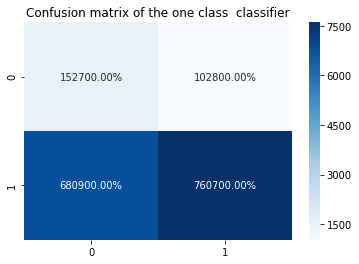

In [285]:
import seaborn as sns
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('Confusion matrix of the one class  classifier')
sns.heatmap(confusion_matrix(test_labels, preds_test) ,annot=True,fmt='.2%', cmap='Blues')
plt.show()

Let's check how model is performing 

In [286]:
#x = test_text
#y= test_labels
#plt.scatter(x,y,alpha=0.7, c=y) 
#plt.xlabel('x1') 
#plt.ylabel('x4')

In [287]:
# let's take random text from dataset
test_text[3]

'Performance report'

In [288]:
# check actual category
test_labels[3]

1

In [289]:
# let's predict the category of above random text
print(pipe_clf.predict([test_text[3]]))
print(pipe_clf.predict(['outlook failed to open because of new patch']))
print(pipe_clf.predict(['laptop steal issue ']))
print(pipe_clf.predict(['laptop not opened because of lockdown']))
print(pipe_clf.predict(['']))

[1]
[1]
[-1]
[-1]
[1]


In [290]:
'outlook failed to open because of new patch'

'outlook failed to open because of new patch'

our model predicted random text as sport category which is correct

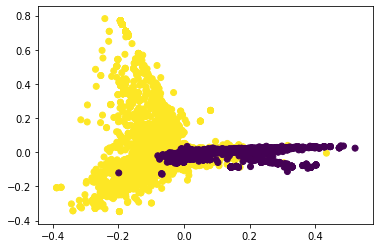

In [291]:
%matplotlib inline
#from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
#https://stackoverflow.com/questions/28160335/plot-a-document-tfidf-2d-graph
#newsgroups_train = fetch_20newsgroups(subset='train', 
                                      #categories=['alt.atheism', 'sci.space'])
#print(newsgroups_train.target)
#print(newsgroups_train)
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])        
X = pipeline.fit_transform(test_text).todense()

pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
plt.scatter(data2D[:,0], data2D[:,1], c=test_labels)
plt.show() 

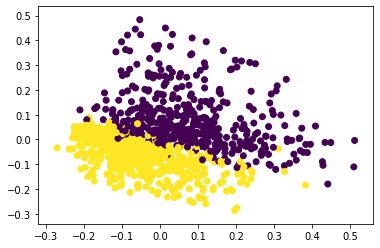

In [292]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

newsgroups_train = fetch_20newsgroups(subset='train', 
                                      categories=['alt.atheism', 'sci.space'])
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])        
X = pipeline.fit_transform(newsgroups_train.data).todense()

pca = PCA(n_components=2).fit(X)
data2D = pca.transform(X)
plt.scatter(data2D[:,0], data2D[:,1], c=newsgroups_train.target)
plt.show()              #not required if using ipython notebook


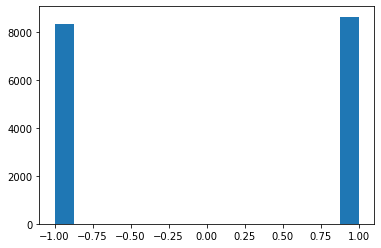

In [293]:
plt.hist(preds_test, bins='auto')
plt.show()

In [294]:
preds_test.shape

(16971,)

In [295]:
for i in range(len(test_labels)):
    if preds_test[i] == -1 and test_labels[i] == 1:
        print(test_text[i])

VM tools updates by ESX update
VM Hardware installation with commands
CPU Utilization
Physical Memory Utilization
Device Temperature
Link Utilization
Device Uptime
fetch report of switchport status on one or multiple switches. [example headings: switchname, switchport interface number, interface status, learning mac address on the interface, interface description,..]
fetch list of accesspoint client details with IP address & hostnmaes
Fetch list of APs associated in WLC with High Availability details
Add/Delete users to/from AD groups
Creating new admins in security appliances
Check the VPN tunnel status in firewall
Manage drive cleanings
Monitoring backup alert failures
Monitor Backup jobs
Provide public folder administration services, including creation/deletion of folders, folder owner permissions and ownership assignment, and folder replication management.
Organizational Unit creation, deletion and delegation.
Backing up / restoring Active Directory objects.
Reviewing all performan

Configure Resource Governor
Database creation and configuration
Configure Availability Group
Link utilization Report
Polycom Reboot
Configuring network device backup reports
Automating Holiday routing
User accounts - like create ,delete using oracle query
Manage user Profiles/Policies  - using grant like queries
Configure TNS 
Configure SQLNET (expire time ,defaultdomain,defaultzone )
Check database status  - using the predefined db query
OS and Network related
Tablespace  - monitors tablespace using the predefined db query
Monitor  (3 predefined parameters)
logfiles,alert files,trace files and any files auto clean
Certificate lifespan alert report
Certificate Expiration Report 
Purdue Windows Account Transactions report
Purdue VPN logon attempts report
Certificate lifespan alert report
Certificate Expiration Report 
Create a new site
Add user to group or domin
Backup/Restore sites
Health analyzer reports
CPU utilization
Memory utilization
Server status
Enabling the features at web app

check database recovery model
check what traces are currently on the serve
Monitoring - Adding SNMP configs to new device
Memory Utlization on router
CPU Utilization on router
Link utilization on router
Switch Memory Utlization
Switch CPU Utilization
Wireless - Checking if AP is up or down 
Switch Interface Down Monitor
Enabling/disabling a switch port
Device uptime (router / switch)
SNMP Agent Not responding for router
Check database status  - using the predefined db query
Database - monitors Database using the predefined db query
Tablespace  - monitors tablespace using the predefined db query
DB health check report
Listener -(monitors listner for 3 predefined parameters)
setup User  and  groups -using the existing commands 
Database refreshes
Grant access rights - access rights to user using oracle query
Check necessary packages - checks for necessary pkg like binutils,compat-lib , elfutils-lib, gcc,sysstat
Manage user Profiles/Policies  - using grant like queries
User accounts - lik

Configure DB parameters file  -(3 predefined parameters)
Configure listener  - using the predefined db query
Configure Oracle Automatic Storage Management (ASM)
Configure OS parameters, environment variables  -(3 predefined parameters)
Configure SQLNET (expire time ,defaultdomain,defaultzone )
Configure TNS 
Create database
Create directory structure layout to place database files
Database - monitors Database using the predefined db query
Database refreshes
Database upgradation
Install Oracle Software using the existing script
Installing ASMlib
Installing Oracle Enterprise Manager (OEM) Grid Control
Listener -(monitors listner for 3 predefined parameters)
Manage DB link
Manage user Profiles/Policies  - using grant like queries
Migrate database [ Cross Platform ]  - using the predefined db query
Migrate database [ same Platform ]  - using the predefined db query
Monitor DB link
Monitor job status
Network / Connectivity issues
Oracle Management Agent configuration
Oracle Management Agent

Configuration management report for performance
create lun 
De-provision LUN to HOST
Provision LUN to HOST
display the error logs
This script is used for database daily health check
Script gets Licensing information and calculates licenses in use, total number of licenses, percentage currently in use. Also, it checks the usage and send an email if over 90%.
Script list out total number of servers in one Xenapp farm, list out number of online servers, list out number of offline servers and also list out number of online servers in zone.
Script uses the Citrix farm API to check all citrix servers in the farm. It then runs variou checks against each server and only logs the results of any failures. The script runs everyday at 1 AM.
Scripts sends daily reports to specified mail id. Reports such as, Logon report, Offline servers report and report for serverload if load is greater than 7500.
Script generates a output text file with sizes of sub directories of specified input directory.
The s

The script will retrieve  memberof groups for the specified list of users.
The script will create service accounts in AD. The Network id not morethan 20 characters and the script will assign all the needed attributes and it will take input as CSV format.
The script will send welcome email to multiple new hires. It will take input as CSV file having the field Email Id.
The script will mirror all the memeberof groups from the mirror id to the specified user id.
Identifying SNMP failing devices
Checking and cleaning MSMQ folder on Polling Engines
Citrix Server System Up Time Check
Expansion / Shrink of LUNs volume
MNS pulls up BW utilization report,checks if BW is used by business application or non business application, work with CDM and wireless team to identifying the users accessing non business applications and email to customer, Customer speaks with user and Educate him.
Monitor File System Usage
Listing of paging device
Apply patch - patches using utility like opatch 
Database refr

Creating a room mailbox
How to assign Office365 E4/E3 License
Visio license management
List all AD group
Setting Database Environment Variables - updates the  default env var
Create directory structure layout to place database files
Configure DB parameters file  -(3 predefined parameters)
Create database
Primary standby reporting
Database - monitors Database using the predefined db query
Tablespace  - monitors tablespace using the predefined db query
Table  - monitor table using the predefined db query
Antivirus software installaton
Add/Remove/Modify Filesystem
Add/Remove/modify groups
Add/Remove/modify users
Add/Remove/modify users
Add/Remove/modify groups
monitor CPU Utilization 
monitor Memory Utilization
monitor I/O Utilization
Fetching OS version for multiple servers
Application installation
Bookin policy for Restricted Rooms
Group Policy 
Room list based on file
Health checkup
CPU utilisation
Adding Conf room to the list
Room Editor list
VP restricted rooms
ServiceAccount
Server 

High Memory Utilization
Server RDP issue
Server Reboot Request
Script for Server Local users and Administrator group

Delete Snapshots
Snapshot Creation problem
Oracle DB Build Automated Report
DR-DHC Automation
IQOQ Validation & Scanning
Control procedure remediation script
Fetch data from excel file&#40;Service Now RITM Numbers&#41; and mail it to mentioned users.
Update old configuration file of a specified path on remote machines.
High CPU Usage alert &#40;* Rep with R Drive&#41;
Memory Utilization Alert
Ping failure Handling
SCOM node Maintenance mode
Automation of Machine Catalogue report
Enabling SCOM Monitor/Rule
SP 2013 failover and reboot process (Non-Prod)
Resolve Alerts for a Monitor and rule
SP 2013 failover and reboot process (Prod)
Citrix Complete Health Check Report.
Monitor and restart of exchange services via MS SCORCH.
Monitor and restart of skype services via MS SCORCH.
Exchange servers certification expiration alerts.
Automated Health Check Report For Backup Status

Printer creation
printer instance details
Printer addition
Install SNMP Feature
Add printer to the server
RPD Migration(OBIEE .7,.9,12c)
Month end report
SNMP Agent Not responding
Stuck Thread Management
Printer Automation
CPU Utilization
MS ATA Install
New Outlook Profile
Location Automation
Remove Expired Certificate for SharePoint Servers
RDP Issue Report details
List of powered on VMs OS and Location wise Burbank,NJ and UK
Auto-Create Monthly Incident Vs Service Request Report from Service Now and Export it to CSV
Installing VMware Tools
MTD SLA & MTD RITM (Monthly)
Check service installation
CPU usage report
SMIME group removal for multiple users

Device configuration Backup automation
Datastore utilisation monitoring
Solaris - User id Creation
Linux - User id Locking
AIX - User id Locking
Solaris - User id Locking
Monitor and Manage Tablespace Growth/Table and index reorganization
Review Database size and growth
Cross restoration and Back ups Of VIRSQL189P
Review Database size an

In [296]:
features.shape

(14416, 20)

In [297]:
print(features[0])

[-0.57735027  0.          0.          0.          0.          0.57735027
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.57735027  0.        ]


In [298]:
features1 = vectorizer.fit_transform(["cat"]).toarray()

In [299]:
features


array([[-0.57735027,  0.        ,  0.        , ...,  0.        ,
        -0.57735027,  0.        ],
       [ 0.        ,  0.        ,  0.70710678, ...,  0.        ,
         0.70710678,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        , -0.4472136 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.57735027, ...,  0.        ,
         0.        ,  0.        ]])

In [312]:
from eli5.sklearn import InvertableHashingVectorizer
import numpy as np
ivec = InvertableHashingVectorizer(vectorizer)
sample_size = len(test_text) // 10
X_sample = np.random.choice(test_text, size=sample_size)
ivec.fit(X_sample)

InvertableHashingVectorizer(unkn_template='FEATURE[%d]',
                            vec=HashingVectorizer(alternate_sign=True,
                                                  analyzer='word', binary=False,
                                                  decode_error='strict',
                                                  dtype=<class 'numpy.float64'>,
                                                  encoding='utf-8',
                                                  input='content',
                                                  lowercase=True, n_features=20,
                                                  ngram_range=(1, 1), norm='l2',
                                                  preprocessor=None,
                                                  stop_words=None,
                                                  strip_accents=None,
                                                  token_pattern='(?u)\\b\\w\\w+\\b',
                                                 

In [313]:
import eli5

In [314]:
eli5.show_weights(clf, vec=ivec, top=20,target_names=['automatable','non-automatable'])